In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Reading the dataset and cleaning the data:

In [2]:
df = pd.read_csv("perrin-freres-monthly-champagne.csv")
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
df['sales'] = df['Perrin Freres monthly champagne sales millions ?64-?72']
df.drop('Perrin Freres monthly champagne sales millions ?64-?72', axis=1,inplace=True)
df

,Month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [4]:
df.drop(105,axis=0,inplace=True)
df.drop(106,axis=0,inplace=True)

In [5]:
df

,Month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [6]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)
df

,sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [7]:
df.isna().sum()

sales    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   105 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [9]:
df.describe()

,sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<AxesSubplot:xlabel='Month'>

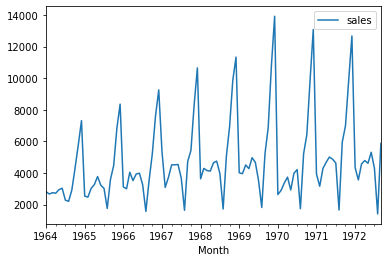

In [10]:
df.plot()

# 2) Decomposing the time series data:

In [11]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL

Text(0.5, 1.0, 'Monthly sales over the years Trend')

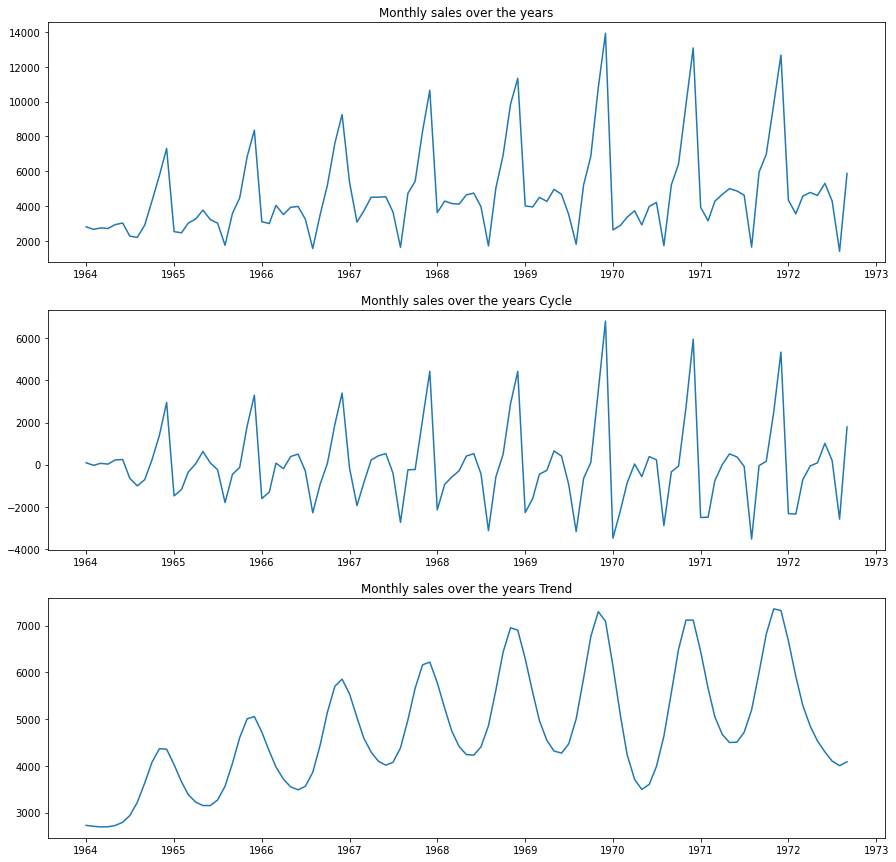

In [12]:
series = df['sales']

cycle, trend = sm.tsa.filters.hpfilter(series, 10)

fig, ax = plt.subplots(3,1, figsize=(15,15))
ax[0].plot(series)
ax[0].set_title("Monthly sales over the years")
ax[1].plot(cycle)
ax[1].set_title("Monthly sales over the years Cycle")
ax[2].plot(trend)
ax[2].set_title("Monthly sales over the years Trend")

# 3) Making the time series stationary:

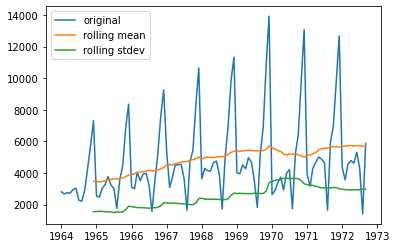

In [13]:
rolling_mean = df.rolling(window=12).mean()
rolling_stdev = df.rolling(window=12).std()


plt.plot(df,label='original')
plt.plot(rolling_mean, label='rolling mean')
plt.plot(rolling_stdev, label = 'rolling stdev')
plt.legend()
plt.show()
# the rolling mean has a trend, hence it is not stationary

In [14]:
# Dickey Fuller test

from statsmodels.tsa.stattools import adfuller

results = adfuller(df['sales'])
print("p value: ",results[1])

if results[1] < 0.05:
    print("REJECT HO: time series is stationary")
else:
    print("DO NOT REJECT H0: time series is not stationary")

p value:  0.3639157716602467
DO NOT REJECT H0: time series is not stationary


In [28]:
# differecning to make the time series stattionary
# try with diff of 1 

df['first difference'] = df['sales'] - df['sales'].shift(1)

# Dickey Fuller to see if the seasonal difference is stationary

results = adfuller(df['seasonal difference'].dropna())
print("p value: ",results[1])

if results[1] < 0.05:
    print("REJECT HO: time series is stationary")
else:
    print("DO NOT REJECT H0: time series is not stationary")

p value:  2.0605796968136632e-11
REJECT HO: time series is stationary


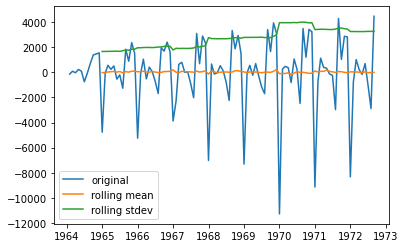

In [29]:
rolling_mean = df['first difference'].dropna().rolling(window=12).mean()
rolling_stdev = df['first difference'].dropna().rolling(window=12).std()


plt.plot(df['first difference'].dropna(),label='original')
plt.plot(rolling_mean, label='rolling mean')
plt.plot(rolling_stdev, label = 'rolling stdev')
plt.legend()
plt.show()

In [15]:
# differecning to make the time series stattionary
# we go for the seasonal difference as we see a seasonal component 

df['seasonal difference'] = df['sales'] - df['sales'].shift(12)

# Dickey Fuller to see if the seasonal difference is stationary

results = adfuller(df['seasonal difference'].dropna())
print("p value: ",results[1])

if results[1] < 0.05:
    print("REJECT HO: time series is stationary")
else:
    print("DO NOT REJECT H0: time series is not stationary")

p value:  2.0605796968136632e-11
REJECT HO: time series is stationary


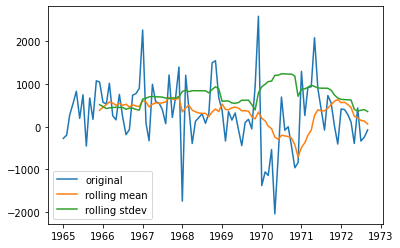

In [16]:
rolling_mean = df['seasonal difference'].dropna().rolling(window=12).mean()
rolling_stdev = df['seasonal difference'].dropna().rolling(window=12).std()


plt.plot(df['seasonal difference'].dropna(),label='original')
plt.plot(rolling_mean, label='rolling mean')
plt.plot(rolling_stdev, label = 'rolling stdev')
plt.legend()
plt.show()

# 4) Autocorrelation:

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

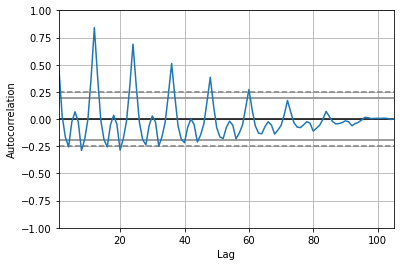

In [17]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['sales'])

C:\Users\Josh\anaconda3\envs\SignLangauge\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


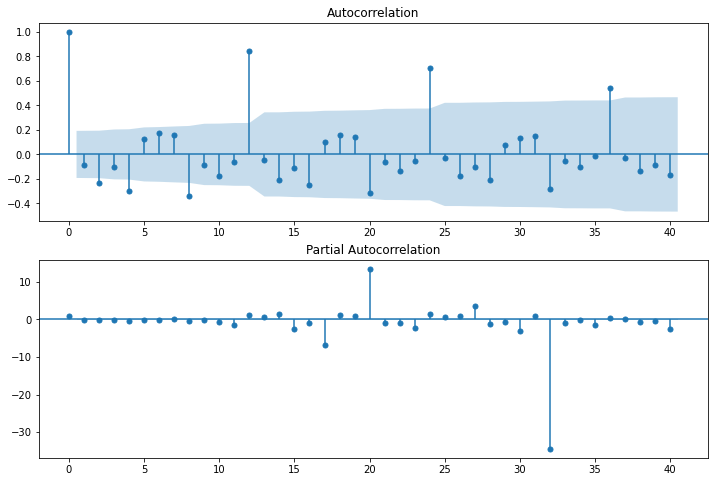

In [30]:
from statsmodels.graphics.tsaplots import acf, pacf

# plotting the acf and pacf on the seasonal difference to get an idea of what the forecasting model will be
# we can also get an idea of how the seasonal component fucntions from the acf plot


fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['first difference'].iloc[1:], lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['first difference'].iloc[1:], lags=40, ax=ax2)

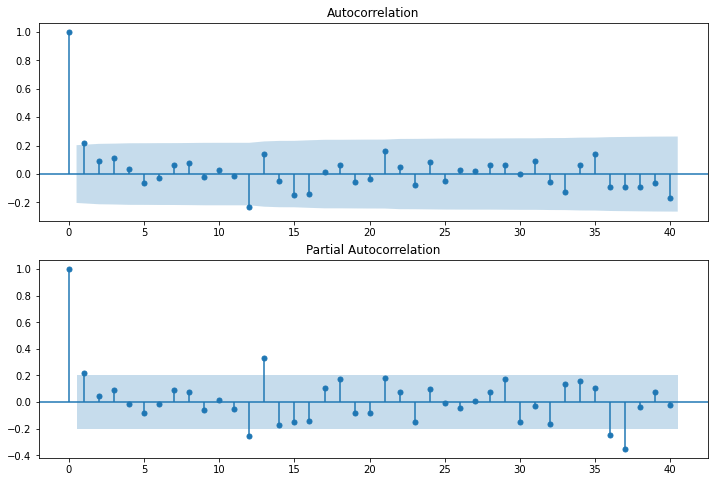

In [18]:
from statsmodels.graphics.tsaplots import acf, pacf

# plotting the acf and pacf on the seasonal difference to get an idea of what the forecasting model will be
# we can also get an idea of how the seasonal component fucntions from the acf plot


fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['seasonal difference'].iloc[12:], lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['seasonal difference'].iloc[12:], lags=40, ax=ax2)

# 5) Finding the best model and then forecasting:

In [19]:
# using pmdarima to get the best forecasting model:

import pmdarima as pmd

def best_arima_model(timeseries):
    auto_arima_model = pmd.auto_arima(timeseries,
                                     start_p=1,
                                     start_q=1,
                                     test="adf", trace=True)
    return auto_arima_model

arima_model = best_arima_model(df['sales'])
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1922.735, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1948.469, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1925.227, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1918.917, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2104.630, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1920.359, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1922.465, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2012.608, Time=0.09 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.585 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  105
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -956.458
Date:                Fri, 05 Nov 2021   AIC                           1918.917
Time:                        12:04:46   BIC                           1926.878
Sample:                             0   HQIC                          1922.143
                                - 105                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4618.5049    386.204     11.959      0.000    3861.558    5375.452
ma.L1          0.6424      0.069      9.279      0.000       0.507       0.778
sigma2      4.707e+06    6.4e+05      7.356      0.000    3.45e+06    5.96e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 5.42
Prob(Q):                              0.70   Prob(JB):                         0.07
Heteroskedasticity (H):               3.86   Skew:                             0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
model = sm.tsa.statespace.SARIMAX(df['sales'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarimax_model = model.fit()

C:\Users\Josh\anaconda3\envs\SignLangauge\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Josh\anaconda3\envs\SignLangauge\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [21]:
sarimax_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Fri, 05 Nov 2021   AIC                           1486.804
Time:                                    12:04:47   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

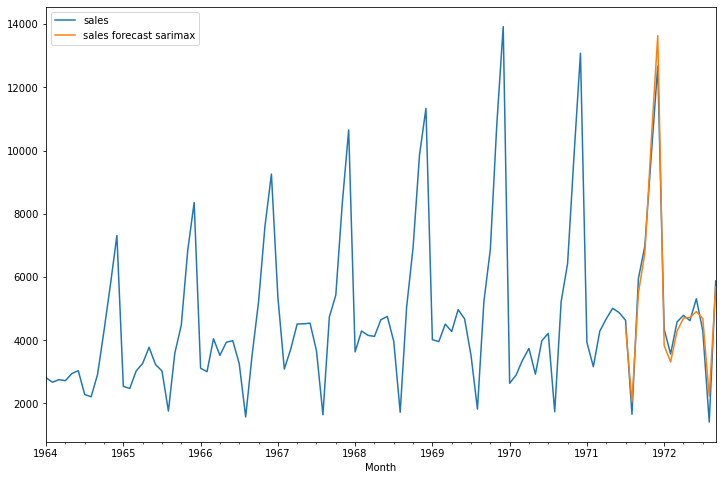

In [22]:
df['sales forecast sarimax'] = sarimax_model.predict(start=90, end=104, dynamic=True)
df[['sales', 'sales forecast sarimax']].plot(figsize=(12,8))

In [23]:
# create future dates for forecasting

from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [24]:
# create dataset with future dates as index and same column as the original dataframe
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
# concatenate the new future df and the original df
future_df=pd.concat([df,future_dates_df])

future_df

,sales,seasonal difference,sales forecast sarimax
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,NaN,NaN
1964-03-01,2755.0,NaN,NaN
1964-04-01,2721.0,NaN,NaN
1964-05-01,2946.0,NaN,NaN
...,...,...,...
1974-04-01,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN


<AxesSubplot:>

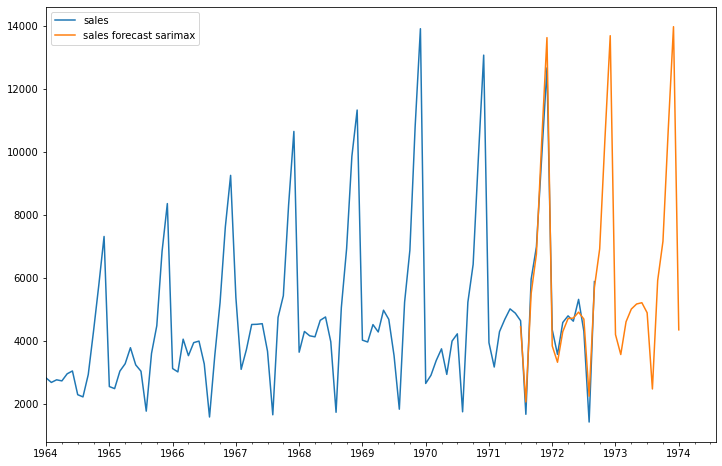

In [27]:
# using the future dates, we can now forecast
future_df['sales forecast sarimax'] = sarimax_model.predict(start = 90, end = 120, dynamic= True)  
future_df[['sales', 'sales forecast sarimax']].plot(figsize=(12, 8))